In [31]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [10]:
#loading the data
df_day = pd.read_csv('data/day.csv', index_col='instant')

df_hour = pd.read_csv('data/hour.csv', index_col='instant')

In [11]:
df_day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [12]:
df_day.tail()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [14]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 731 entries, 1 to 731
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.4+ KB


In [15]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.3+ MB


In [19]:
#converting the date columns to correct format
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

<Axes: >

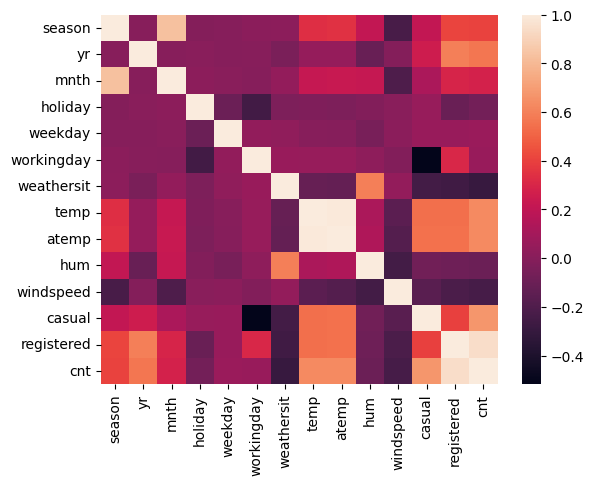

In [18]:
#Lets observe the correlations in between the features
corr = df_day.loc[:,df_day.columns!='dteday'].corr()
sns.heatmap(corr)

We can see a positive correlation in between:

- cnt vs registered
- cnt vs temp, atemp
- cnt vs casual
- cnt vs year
- registered vs temp, atemp
- registered vs year
- casual vs temp, atemp
- hum vs weathersit
- mnth vs season
- (maybe casual vs workingday?)

I have only considered the ones that have more than 0.6

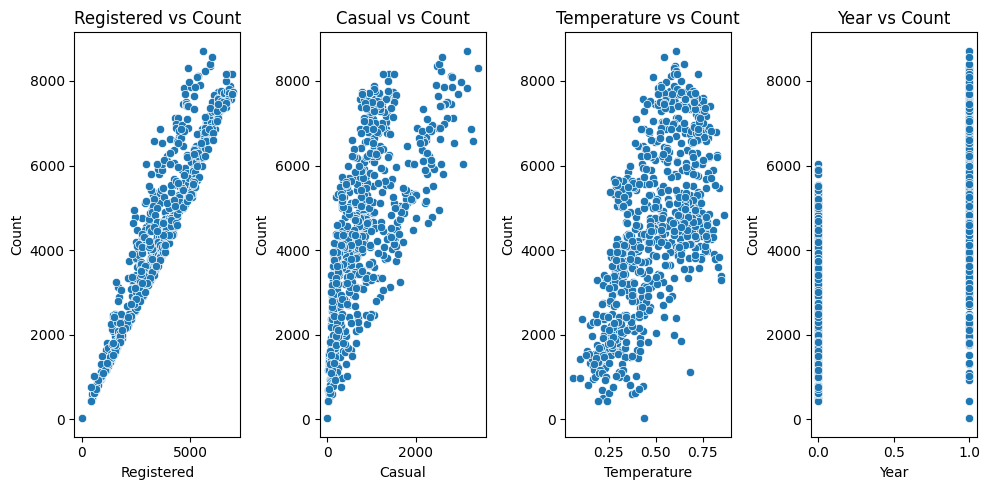

In [20]:
#Lets observe the correlations closer
fig, axes = plt.subplots(1,4, figsize=(10,5))

sns.scatterplot(data=df_day, x='registered', y='cnt', ax=axes[0])
axes[0].set_title('Registered vs Count')
axes[0].set_xlabel('Registered')
axes[0].set_ylabel('Count')

sns.scatterplot(data=df_day, x='casual', y='cnt', ax=axes[1])
axes[1].set_title('Casual vs Count')
axes[1].set_xlabel('Casual')
axes[1].set_ylabel('Count')

sns.scatterplot(data=df_day, x='temp', y='cnt', ax=axes[2])
axes[2].set_title('Temperature vs Count')
axes[2].set_xlabel('Temperature')
axes[2].set_ylabel('Count')

sns.scatterplot(data=df_day, x='yr', y='cnt', ax=axes[3])
axes[3].set_title('Year vs Count')
axes[3].set_xlabel('Year')
axes[3].set_ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
#preparing the data for ols
linear_data = df_day[['cnt', 'temp', 'yr', 'registered']]

#one hot encoding the categorical variable (year)
year_dummies = pd.get_dummies(df_day['yr'], prefix='yr')
linear_data = pd.concat([linear_data, year_dummies], axis=1)
linear_data = linear_data.drop(columns=['yr'])

x_train, x_test, y_train, y_test = train_test_split(linear_data.drop(columns=['cnt']), linear_data['cnt'], test_size=0.3, random_state=42)


In [27]:
linear_data.head()

,cnt,temp,registered,yr_0,yr_1
instant,,,,,
1,985,0.344167,654,True,False
2,801,0.363478,670,True,False
3,1349,0.196364,1229,True,False
4,1562,0.200000,1454,True,False
5,1600,0.226957,1518,True,False


In [ ]:
#creating the model
ols_formula = 'cnt ~ temp + yr_0 + yr_1 + registered'
OLS = ols(formula=ols_formula, data=pd.concat([x_train, y_train], axis=1))
OLS_model = OLS.fit()
OLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     1654.
Date:                Mon, 07 Apr 2025   Prob (F-statistic):          2.52e-261
Time:                        07:06:59   Log-Likelihood:                -3977.3
No. Observations:                 511   AIC:                             7963.
Df Residuals:                     507   BIC:                             7980.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -44.0059     56.168     -0.783      0.434    -154.357      66.345
yr_0[T.True]  -213.1922     37.389     -5.702      0.000    -286.650    -139.735
yr_1[T.True]   169.1863     49.997      3.384      0.001      70.959     267.414
temp          2151.4402    187.082     11.500      0.000    1783.890    2518.991
registered       0.9629      0.027     36.118      0.000       0.910       1.015
==============================================================================
Omnibus:                      122.443   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.009
Skew:                           1.378   Prob(JB):                     8.37e-50
Kurtosis:                       4.737   Cond. No.                     2.29e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.55e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [32]:
#predicting the values
predictions = OLS_model.predict(x_test)

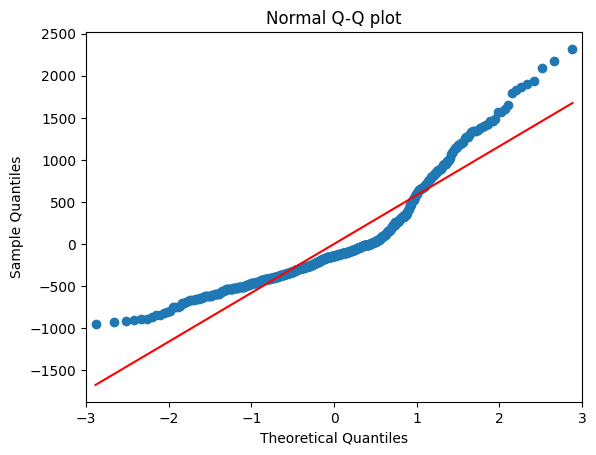

In [34]:
#checking normality assumption
sm.qqplot(OLS_model.resid, line='s')
plt.title('Normal Q-Q plot')
plt.show()

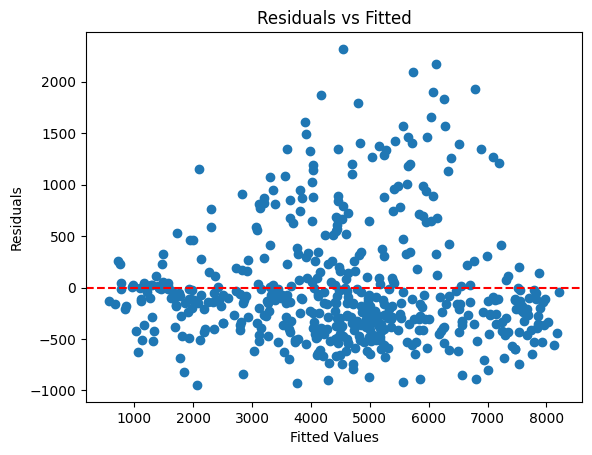

In [ ]:
#checking homoscedasticity assumption
plt.scatter(OLS_model.fittedvalues, OLS_model.resid)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted Values') 
plt.ylabel('Residuals')
plt.show()